# Cmpe 548 Monte Carlo Methods Assignment 1

***** Alper Ahmetoğlu 2012400147 

## Inversion method, Rejection Sampling

### Problem 1

In [92]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def t(x):
    return 2 * np.pi * x

def r(x):
    return np.sqrt(x)

These functions are CDFs for variables $\theta$ and $\rho$ respectively. CDF for theta is trivial since we need a uniform distribution defined in $[0, 2\pi]$. Since

$$f(x) = \int_{0}^{2 \pi } dx = 1$$

$$ F(x) = \frac{x}{2\pi}$$

$$ F^{-}(x) = 2 \pi x$$

Our approach is to first draw the angle, then draw a point from line with the drawn angle. If we draw samples from uniform distribution for $\rho$, we wouldn't have a uniform distribution in the circle. In 2-dimensional space, $\rho$ should be distributed with respect to $f(x) = 2x$.

$$f(x) = \int_{0}^{1} 2x dx = 1$$

$$ F(x) = x^2 $$

$$ F^{-}(x) = x^{1/2} $$



(-1.0, 1.0, -1.0, 1.0)

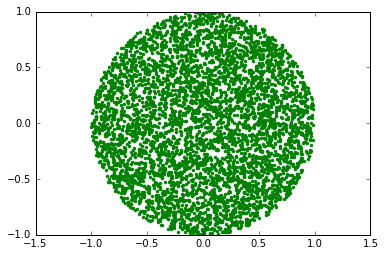

In [93]:
N = 5000
u1 = np.random.rand(N)
u2 = np.random.rand(N)

sample_theta = t(u1)
sample_rho = r(u2)

x = np.cos(sample_theta) * (sample_rho)
y = np.sin(sample_theta) * (sample_rho)

plt.plot(x,y,'.g')
plt.axis('equal')

### Problem 2

- For $p=1.5$

hit ratio:  0.8712


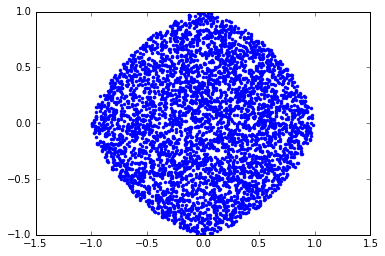

In [94]:
p = 1.5;

hits = [[],[]]
misses = 0

for i in range(N):
    if np.power((np.power(np.absolute(x[i]),p) + np.power(np.absolute(y[i]),p)),1/p) <= 1:
        hits[0].append(x[i])
        hits[1].append(y[i])
    else:
        misses += 1

plt.plot(hits[0],hits[1],'.b')
plt.axis('equal')
print("hit ratio: ", 1-misses/N)

- For $p=0.7$

hit ratio:  0.4022


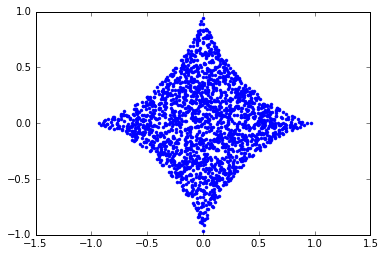

In [95]:
p = 0.7;

hits = [[],[]]
misses = 0

for i in range(N):
    if np.power((np.power(np.absolute(x[i]),p) + np.power(np.absolute(y[i]),p)),1/p) <= 1:
        hits[0].append(x[i])
        hits[1].append(y[i])
    else:
        misses += 1

plt.plot(hits[0],hits[1],'.b')
plt.axis('equal')
print("hit ratio: ", 1-misses/N)

*** Different proposal ***

We can take a diamond-shaped proposal which will increase our hit ratio. A diamond-shaped proposal is simply a $\sqrt{2} \times \sqrt{2}$ square rotated by $\pi / 4$.

hit ratio:  0.6308


(-1.0, 1.0, -1.0, 1.0)

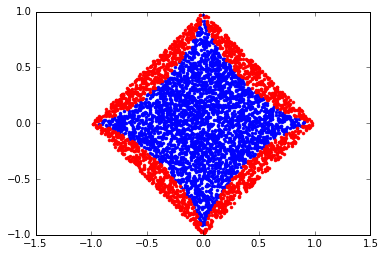

In [96]:
m1 = np.random.rand(N)*(np.power(2,1/2)) - np.power(2,1/2)/2
m2 = np.random.rand(N)*(np.power(2,1/2)) - np.power(2,1/2)/2

## Rotating by pi/4
r1 = m1 * np.cos(np.pi/4) + m2 * np.sin(np.pi/4)
r2 = m1 * np.sin(-np.pi/4) + m2 * np.cos(-np.pi/4)

hits = [[],[]]
miss = [[],[]]

for i in range(N):
    if np.power((np.power(np.absolute(r1[i]),p) + np.power(np.absolute(r2[i]),p)),1/p) <= 1:
        hits[0].append(r1[i])
        hits[1].append(r2[i])
    else:
        miss[0].append(r1[i])
        miss[1].append(r2[i])

print("hit ratio: ",  1-len(miss[0])/N)
plt.plot(hits[0],hits[1],'.b',miss[0],miss[1],'.r')
plt.axis('equal')

### Bonus

In order to generate random samples from $n$ dimensional ball, we should generate a direction and a length. Generating direction can be achieved by drawing samples from $n-1$ dimensional sphere. For instance, if we want to draw samples from $2$ dimensional ball, which is a disk, we should draw from $1$ dimensional sphere (which is a circle) in order to generate a direction. For $3$ dimensional ball, (which is a ball) we should draw from $2$ dimensional sphere (a sphere) for direction and so on.

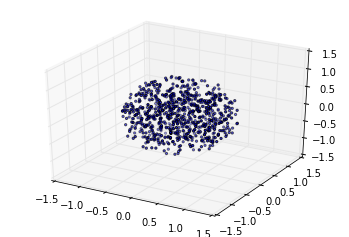

In [119]:
N1 = 800

k1 = np.random.randn(N1)
k2 = np.random.randn(N1)
k3 = np.random.randn(N1)

def r2(x):
    return np.power(x,1/3)

rh = r2(np.random.rand(N1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

normalized = [k1/np.power((k1 ** 2 + k2 ** 2 + k3 ** 2),1/2), k2/np.power((k1 ** 2 + k2 ** 2 + k3 ** 2),1/2), k3/np.power((k1 ** 2 + k2 ** 2 + k3 ** 2),1/2)] * rh

ax.scatter(normalized[0],normalized[1], normalized[2], marker='.')


The method illustrated above is an example for $3$ dimensional case.

### Generating direction

I do not intuitively understand this method yet but it works on simulation. For $n$ dimensional ball, we should generate points from $n-1$ dimensional sphere as state before. Though what is the distribution of $n-1$ dimensional sphere or how can we draw uniform samples from $n-1$ dimensional sphere ? The answer is that for $n-1$ dimensional case, we draw from $n$ different normal distribution, normalize them and use it as a direction. Though I do not entirely understand how this distribution generates samples uniformly.

### Generating length

This is easier compared to generating direction in my opinion. As we have done in first problem, variable $\rho$ should be distributed with respect to its ideal occurence rate in $n$ dimensional space. For $2$ dimensional case, as $\rho$ increases, since we have $2$ dimensions it has (in a sense) more choices. In general, CDF for $n$ dimensional $\rho$ is

$$ f(x) = x^n $$

$$ F^{-}(x) = x^{1/n} $$